In [5]:
from sklearn.metrics import precision_recall_curve, f1_score, auc
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


Receiver Operating Characteristic (ROC) curves are appropriate when the observations are balanced between each class, whereas precision-recall curves are appropriate for imbalanced datasets.
Therefore, we don't use ROC curve in this case, assuming that the anomalies are rare.

In [2]:
df = pd.read_csv('data/bottle_results.csv')
y_score, y_test = df['Scores'], df['Label']

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

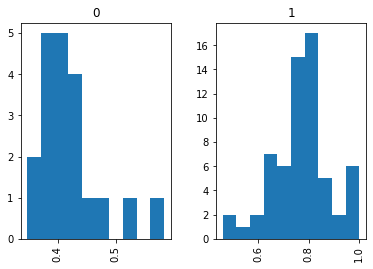

In [3]:
df['Scores'].hist(by=df['Label'])

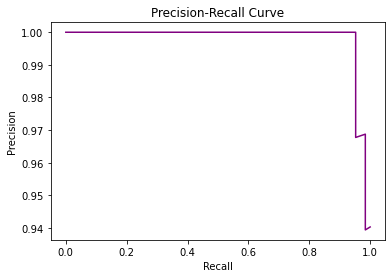

In [4]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Sample Count')

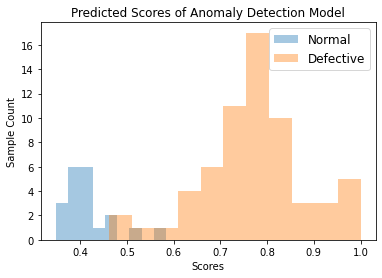

In [8]:
normal = df[df.Label == 0]
defective = df[df.Label == 1]

sns.distplot(normal['Scores'],  kde=False, label='Normal')
sns.distplot(defective['Scores'],  kde=False,label='Defective')

# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Predicted Scores of Anomaly Detection Model')
plt.xlabel('Scores')
plt.ylabel('Sample Count')


In [13]:
# calculate precision-recall AUC
auc = auc(recall, precision)

In [6]:
normal = df[df.Label == 0]
defective = df[df.Label == 1]

In [7]:
normal

,Unnamed: 0,Scores,Predicted,FileName,Label
63,63,0.392268,Normal,datasets\MVTec\bottle\test\good\000.png,0
64,64,0.397389,Normal,datasets\MVTec\bottle\test\good\001.png,0
65,65,0.462828,Normal,datasets\MVTec\bottle\test\good\002.png,0
66,66,0.347990,Normal,datasets\MVTec\bottle\test\good\003.png,0
67,67,0.387618,Normal,datasets\MVTec\bottle\test\good\004.png,0
68,68,0.365845,Normal,datasets\MVTec\bottle\test\good\005.png,0
69,69,0.583107,Anomalous,datasets\MVTec\bottle\test\good\006.png,0
70,70,0.424436,Normal,datasets\MVTec\bottle\test\good\007.png,0
71,71,0.399648,Normal,datasets\MVTec\bottle\test\good\008.png,0
72,72,0.423186,Normal,datasets\MVTec\bottle\test\good\009.png,0


In [28]:
recall

array([1.      , 0.984375, 0.96875 , 0.953125, 0.9375  , 0.921875,
       0.90625 , 0.890625, 0.875   , 0.859375, 0.84375 , 0.828125,
       0.8125  , 0.796875, 0.78125 , 0.765625, 0.75    , 0.734375,
       0.71875 , 0.703125, 0.6875  , 0.671875, 0.65625 , 0.640625,
       0.625   , 0.609375, 0.59375 , 0.578125, 0.5625  , 0.546875,
       0.53125 , 0.515625, 0.5     , 0.484375, 0.46875 , 0.453125,
       0.4375  , 0.421875, 0.40625 , 0.390625, 0.375   , 0.359375,
       0.34375 , 0.328125, 0.3125  , 0.296875, 0.28125 , 0.265625,
       0.25    , 0.234375, 0.21875 , 0.203125, 0.1875  , 0.171875,
       0.15625 , 0.140625, 0.125   , 0.109375, 0.09375 , 0.078125,
       0.      ])